In [ ]:
# Importar librerías
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import classification_report # Para generar reportes de métricas de clasificación
from skimage.feature import hog # Para extraer características HOG (Histogram of Oriented Gradients) de imágenes
from sklearn.utils import shuffle # Para mezclar aleatoriamente los datos
from tensorflow.keras.models import Sequential # Para construir modelos de redes neuronales secuenciales
from tensorflow.keras.layers import Dense, Dropout # Para agregar capas densas y de regularización (Dropout) al modelo
from tensorflow.keras.metrics import Precision, Recall # Para calcular precisión y recall durante el entrenamiento
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Para calcular y mostrar la matriz de confusión
import random # Para operaciones aleatorias (por ejemplo, selección aleatoria)
from datetime import datetime # Para trabajar con fechas y horas (por ejemplo, timestamp de ejecuciones)

2025-06-01 11:50:48.914616: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-01 11:50:48.923541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-01 11:50:48.933970: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-01 11:50:48.937661: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-01 11:50:48.946835: I tensorflow/core/platform/cpu_feature_guar

In [ ]:
# Parámetros globales
IMAGE_SIZE = (48, 96) # Tamaño estándar al que se redimensionarán todas las imágenes (ancho, alto)
PED_DIR = "/mnt/c/Users/Raven/Desktop/MNA/Navegacion/Tarea - Keras/TrainingData/Pedestrians/48x96/"
NPED_DIR = "/mnt/c/Users/Raven/Desktop/MNA/Navegacion/Tarea - Keras/TrainingData/NonPedestrians/"
SEED = 42 # Semilla para asegurar la reproducibilidad en operaciones aleatorias

In [ ]:
# Función para extraer HOG
def extract_hog_features(image_path, image_size=IMAGE_SIZE):
  # Abre la imagen y la convierte a escala de grises
    img = Image.open(image_path).convert('L')
  # Redimensiona la imagen al tamaño especificado
    img = img.resize(image_size)
  # Convierte la imagen a un arreglo numpy y normaliza los valores de píxel a [0, 1]
    img_np = np.array(img, dtype=np.float32) / 255.0
  # Extrae las características HOG usando los parámetros definidos
    features = hog(img_np, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), block_norm='L2-Hys')
    return features

In [ ]:
# Cargar dataset con HOG
def load_dataset(ped_dir, nped_dir):
    X, y = [], []
    # Itera sobre ambos directorios: peatones (label=1) y no peatones (label=0)
    for folder, label in [(ped_dir, 1), (nped_dir, 0)]:
    # Procesa solo archivos con extensión .pgm
        for file in os.listdir(folder):
            if file.lower().endswith(".pgm"):
                path = os.path.join(folder, file)
                feat = extract_hog_features(path)
                if feat is not None:
                    X.append(feat)
                    y.append(label)
    return np.array(X), np.array(y)
# Carga y mezcla aleatoriamente el dataset completo de peatones y no peatones
X, y = load_dataset(PED_DIR, NPED_DIR)
X, y = shuffle(X, y, random_state=SEED)

In [ ]:
# Split del dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED)

print(f"Total de elementos: {X.shape[0]} | Características HOG: {X.shape[1]}")

Total de elementos: 22404 | Características HOG: 1980


In [ ]:
# Modelo de Red neuronal densa
# Definición del modelo de red neuronal secuencial para clasificación binaria.
# El modelo consta de dos capas densas con activación ReLU y capas Dropout para evitar sobreajuste.
# La capa de salida utiliza activación sigmoide para producir una probabilidad (clasificación binaria).

model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


/home/raven/miniconda3/envs/nav3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748800385.027955  130436 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1748800385.139063  130436 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1748800385.139140  130436 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1748800385.142074  130436 cuda_executor.c

In [ ]:
# Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30


I0000 00:00:1748800386.762683  130513 service.cc:146] XLA service 0x75065c004820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748800386.762712  130513 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-06-01 11:53:06.777341: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-06-01 11:53:06.861190: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201


106/449 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9067 - loss: 0.2372

I0000 00:00:1748800387.595716  130513 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9629 - loss: 0.0974 - val_accuracy: 0.9989 - val_loss: 0.0036
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9978 - loss: 0.0061 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9978 - val_loss: 0.0048
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0051 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9950 - val_loss: 0.0104
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 0.9930 - val_loss: 0.0171
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9967 - loss: 0.0081 - val_accuracy: 0.9994 - val_loss: 0.0015
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0016 - val_accuracy: 0.9997 - val_

In [ ]:
# Evalúa el modelo entrenado utilizando el conjunto de prueba.
# 'loss' es el valor de la función de pérdida y 'acc' es la precisión obtenida en los datos de prueba.
loss, acc = model.evaluate(X_test, y_test, verbose=0)
# Imprime la precisión del modelo en el conjunto de prueba con cuatro decimales.
print(f"\n Test accuracy: {acc:.4f}")


 Test accuracy: 0.9991


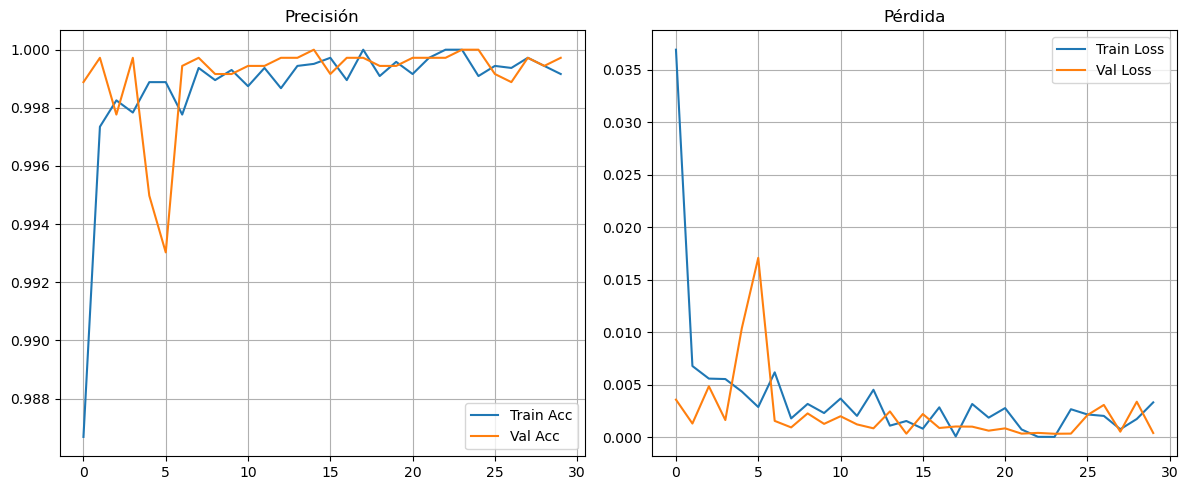

In [ ]:
# Curvas de entrenamiento

# Gráfica de Accuracy Val vs Train
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Precisión")
plt.grid()

# Gráfica de Loss Val vs Train
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Pérdida")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Reporte de clasificación
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\n Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9971    0.9985      1366
           1     0.9987    1.0000    0.9994      3115

    accuracy                         0.9991      4481
   macro avg     0.9994    0.9985    0.9989      4481
weighted avg     0.9991    0.9991    0.9991      4481



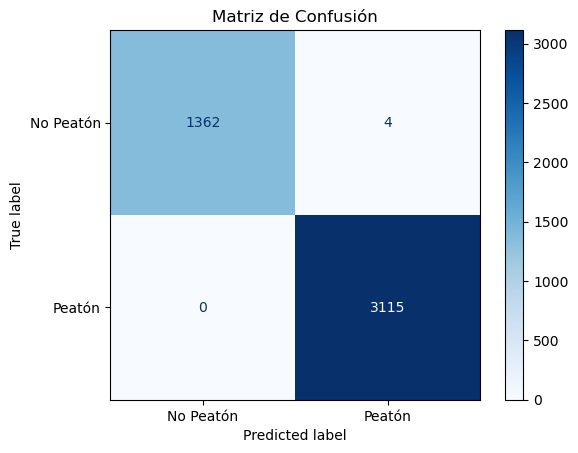

In [ ]:
# Calcular matriz de confusión a partir de las etiquetas reales y las predichas
cm = confusion_matrix(y_test, y_pred)

# Crear el objeto de visualización de la matriz de confusión con etiquetas personalizadas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Peatón", "Peatón"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")# Título del gráfico
plt.grid(False))  # Quitar la cuadrícula para mejor visualización
plt.show()# Mostrar la gráfica en pantalla

In [ ]:
# Guardar modelo
# Guardar el modelo entrenado de Keras con un nombre único usando la fecha y hora actual.
# Esto permite conservar diferentes versiones del modelo para referencia o comparación futura.
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model.save(f"Actividad4-1_Keras_Final_{timestamp}.keras")

In [ ]:
# Función para seleccionar una imagen Random del dataset,
# procesarla, predecir su clase y mostrarla
def predict_Random():
    # Se selecciona una carpeta Random (peatón o no peatón)
    class_label = random.choice([0, 1])  # 0 = No peatón, 1 = Peatón
    label_folder = PED_DIR if class_label == 1 else NPED_DIR

    # Se obtiene la lista de las imágenes en la carpeta
    img_files = [f for f in os.listdir(label_folder) if f.lower().endswith((".png", ".jpg", ".jpeg", ".pgm"))]

    # Se selecciona una imagen Random
    img_filename = random.choice(img_files)
    path = os.path.join(label_folder, img_filename)

    # Se extrae la imagen y obtenemos sus características con HOG
    feat = extract_hog_features(path).reshape(1,-1)

    # Se ejecuta la predicción con el modelo
    pred = model.predict(feat)[0][0]
    pred_label = int(pred > 0.5)

    # Se muestra la imagen con su etiqueta correspondiente
    img_display = Image.open(path).convert('L').resize(IMAGE_SIZE)
    plt.imshow(img_display, cmap='gray')
    plt.title(f"Etiqueta Real: {'Peatón' if class_label == 1 else 'No peatón'}\n"
              f"Predicción: {'Peatón' if pred_label == 1 else 'No peatón'} ({pred:.2f})")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


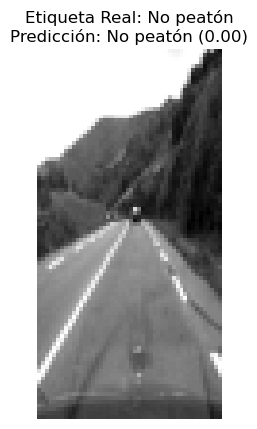

In [ ]:
predict_Random()